In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from tqdm import tqdm
import pickle

pd.options.display.max_rows = 35 
pd.options.display.max_columns = None

NameError: name 'pd' is not defined

In [ ]:
def get_pickles(): 
    x_train = pickle.load(open(f'../../WaterData/pickles/x_train.p', 'rb'))
    x_test = pickle.load(open(f'../../WaterData/pickles/x_test.p', 'rb'))
    y_train = pickle.load(open(f'../../WaterData/pickles/y_train.p', 'rb'))
    y_test = pickle.load(open(f'../../WaterData/pickles/y_test.p', 'rb'))
    X = pickle.load(open('../../WaterData/pickles/X.p', 'rb'))
    y = pickle.load(open('../../WaterData/pickles/y.p', 'rb'))

    return (x_train, x_test, y_train, y_test), (X,y)

(x_train, x_test, y_train, y_test), (X,y) = get_pickles()


print(f'Original X: {X.shape}\tOriginal y: {y.shape}')
print(f'Train X: {x_train.shape}\Train y: {y_train.shape}')
print(f'Test X: {x_test.shape}\Test y: {y_test.shape}')

In [3]:
y_train = y_train.target.values.ravel()
y_test = y_test.target.values.ravel()
y = y.target.values.ravel()

### Baseline Testing for Models and Stacked

In [4]:

models = {'log': LogisticRegression(), 
          'knn': KNeighborsClassifier(),
          'dt': DecisionTreeClassifier(), 'Gaussian': GaussianNB(),
          'rf': RandomForestClassifier(),
            }
#create stacked model
stack_m = [] 
for model, m in models.items(): 
    stack_m.append((model, m))
stack_model = StackingClassifier(estimators = stack_m, final_estimator = LogisticRegression(), cv = 5)
models['stacked'] = stack_model

#test each model and stacking
results = []
model_names = []
pbar = tqdm(models.items())
for model, m in pbar: 
    pbar.set_description(f'Evaluating {model.upper()}')
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10, random_state = 10)
    scores = cross_val_score(m, X, y, scoring = 'accuracy', cv = cv, n_jobs = 10, 
                             error_score = 'raise')
    results.append(scores)
    model_names.append(model)
    

Evaluating STACKED: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [20:47<00:00, 207.92s/it]


In [5]:
print(results)

[array([0.73050362, 0.74313626, 0.73842008, 0.72679805, 0.72073438,
       0.73993599, 0.73218797, 0.74060974, 0.73252484, 0.73247978,
       0.7284824 , 0.73606198, 0.73235641, 0.73286171, 0.73336702,
       0.73488294, 0.73303015, 0.74835776, 0.72460839, 0.7240566 ,
       0.72528213, 0.73808321, 0.74077817, 0.72393465, 0.7313458 ,
       0.73724103, 0.73724103, 0.71770254, 0.72679805, 0.73433288,
       0.73505137, 0.72949301, 0.73336702, 0.72460839, 0.73538824,
       0.73488294, 0.72629274, 0.73589355, 0.72966145, 0.7351752 ,
       0.72056594, 0.74111504, 0.73201954, 0.74633653, 0.73033519,
       0.72629274, 0.7289877 , 0.73067206, 0.73488294, 0.73955526,
       0.72225029, 0.74027287, 0.73842008, 0.72662961, 0.73117736,
       0.72342934, 0.73639885, 0.74701027, 0.73673573, 0.73113208,
       0.725619  , 0.73084049, 0.73370389, 0.74919993, 0.72443995,
       0.73842008, 0.73168267, 0.73370389, 0.73404076, 0.74123989,
       0.73336702, 0.72932457, 0.72443995, 0.73151423, 0.7296

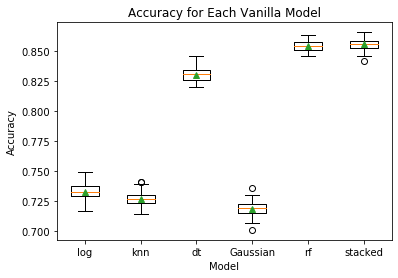

In [8]:
plt.boxplot(results, labels = model_names, showmeans = True)
plt.title('Accuracy for Each Vanilla Model')
plt.ylabel('Accuracy'); plt.xlabel('Model')
plt.savefig('figures/BaselineAccuracy.png')
plt.show()

In [7]:
assert False

AssertionError: 

### Decision Tree and Random Forest Hyperparameter Tuning

In [ ]:
# base_forest = RandomForestClassifier()
# base_forest.fit(x_train, y_train) 
# base_forest_predict = base_forest.predict(x_test, random_state = 100)
# base_cm = classification_report(y_test, base_forest_predict)
# print(base_cm)
# print(base_forest.estimators_)

param_grid = {
    'n_estimators': [50, 75, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 50, 100, 500],
    'max_features': [None,'auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1,5], 
    'bootstrap': [True, False]
}
tuned_forest = RandomForestClassifier()
gs = GridSearchCV(tuned_forest, param_grid, verbose = 1, n_jobs =-1)
gs.fit(x_train, y_train) 


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   57.4s
